# **Import Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk import FreqDist
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
pd.options.mode.chained_assignment = None  # Remove SettingWithCopyWarning
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

Using TensorFlow backend.


# **Load Dataset**

In [2]:
# Train Data
df_train = pd.read_csv('bp_Train.csv')
print(len(df_train))
df_train.head()

C:\Users\vaibh\.conda\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


38016


,date,title,text,type,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170
0,3/11/2016,Governor extends Flint water emergency as stat...,WASHINGTON (Reuters) - Michigan Governor Rick ...,real,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/9/2017,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,fake,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/1/2018,Mexico recognizes Honduran president as winner...,MEXICO CITY (Reuters) - Mexico recognized Hond...,real,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/20/2016,BOOM! Wikileaks Shows Hillary Speech To Banker...,No wonder she didn t want anyone to see her sp...,fake,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/6/2017,Paul Ryan says confident tax reform will pass ...,WASHINGTON (Reuters) - Republicans will be abl...,real,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Test Data
df_test = pd.read_csv('bp_Test_File.csv')
print(len(df_test))
df_test.head()

3000


,date,title,text
0,2017-01-28,Kremlin says Washington must prove hacking acc...,TOKYO (Reuters) - The Kremlin said on Friday t...
1,2015-06-07,OBAMA KNEW DRONE KILLED U.S. HOSTAGE…Never Tol...,Why couldn t the parents be notified of his de...
2,2017-09-01,Wife Of The Japanese PM Epically Trolled Trump...,Amateur president Donald Trump left his chair ...
3,2016-08-14,FBI interviews Hillary Clinton in private serv...,NEW YORK (Reuters) - The Federal Bureau of Inv...
4,2016-12-08,Factbox: Wall Street's take on possible impact...,(Reuters) - U.S. Democratic presidential candi...


# **Data Preprocessing - Part 1**
* Data Clean Up
* Converting columns to categorical / label encoding for feature selection

In [4]:
# Number of Null Values
df_null_count = df_train.isna().sum()
print("Null Count: ", df_null_count)

Null Count:  date                0
title               0
text              534
type               16
Unnamed: 4      38000
                ...  
Unnamed: 166    38014
Unnamed: 167    38014
Unnamed: 168    38014
Unnamed: 169    38014
Unnamed: 170    38014
Length: 171, dtype: int64


In [0]:
# Drop all null columns
df_train.drop(df_train.columns.difference(['date', 'title', 'text', 'type']), 1, inplace=True)

In [7]:
# Drop empty rows or columns
train_df2 = df_train.dropna(axis=0, how='any')
train_df3 = train_df2[pd.to_datetime(train_df2['date'], errors='coerce').notnull()]
train_df3

,date,title,text,type
0,3/11/2016,Governor extends Flint water emergency as stat...,WASHINGTON (Reuters) - Michigan Governor Rick ...,real
1,10/9/2017,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,fake
2,2/1/2018,Mexico recognizes Honduran president as winner...,MEXICO CITY (Reuters) - Mexico recognized Hond...,real
3,11/20/2016,BOOM! Wikileaks Shows Hillary Speech To Banker...,No wonder she didn t want anyone to see her sp...,fake
4,7/6/2017,Paul Ryan says confident tax reform will pass ...,WASHINGTON (Reuters) - Republicans will be abl...,real
...,...,...,...,...
38011,6/10/2017,HE’S BACK! He’s Got Investors Putting Up $12 M...,From the Vanity Fair article: Milo Yiannopoulo...,fake
38012,8/18/2016,FBI Director Comey to testify before House pan...,(Reuters) - FBI Director James Comey is set to...,real
38013,11/15/2017,Greece overcomes forestry setback to develop A...,ATHENS (Reuters) - Greece has won an appeal ov...,real
38014,11/28/2017,China's precedent-breaking Xi Jinping gets set...,BEIJING (Reuters) - Chinese President Xi Jinpi...,real


In [8]:
# Label Encoding categorical values. Covert date to categorical by pulling out month, day, year - For Feature Selection

train_df3['date'] = pd.to_datetime(train_df3['date'], errors='coerce', format='%m/%d/%Y')
train_df3['month'] = train_df3['date'].dt.month
train_df3['day'] = train_df3['date'].dt.day
train_df3['year'] = train_df3['date'].dt.year
train_df3

,date,title,text,type,month,day,year
0,2016-03-11,Governor extends Flint water emergency as stat...,WASHINGTON (Reuters) - Michigan Governor Rick ...,real,3,11,2016
1,2017-10-09,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,fake,10,9,2017
2,2018-02-01,Mexico recognizes Honduran president as winner...,MEXICO CITY (Reuters) - Mexico recognized Hond...,real,2,1,2018
3,2016-11-20,BOOM! Wikileaks Shows Hillary Speech To Banker...,No wonder she didn t want anyone to see her sp...,fake,11,20,2016
4,2017-07-06,Paul Ryan says confident tax reform will pass ...,WASHINGTON (Reuters) - Republicans will be abl...,real,7,6,2017
...,...,...,...,...,...,...,...
38011,2017-06-10,HE’S BACK! He’s Got Investors Putting Up $12 M...,From the Vanity Fair article: Milo Yiannopoulo...,fake,6,10,2017
38012,2016-08-18,FBI Director Comey to testify before House pan...,(Reuters) - FBI Director James Comey is set to...,real,8,18,2016
38013,2017-11-15,Greece overcomes forestry setback to develop A...,ATHENS (Reuters) - Greece has won an appeal ov...,real,11,15,2017
38014,2017-11-28,China's precedent-breaking Xi Jinping gets set...,BEIJING (Reuters) - Chinese President Xi Jinpi...,real,11,28,2017


In [9]:
# Label Encoding categorical values. Covert date to categorical by pulling out month, day, year - For Feature Selection - Test data

df_test['date'] = pd.to_datetime(df_test['date'], errors='coerce', format='%Y-%m-%d')
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['year'] = df_test['date'].dt.year
print(len(df_test))
df_test.head()

3000


,date,title,text,month,day,year
0,2017-01-28,Kremlin says Washington must prove hacking acc...,TOKYO (Reuters) - The Kremlin said on Friday t...,1,28,2017
1,2015-06-07,OBAMA KNEW DRONE KILLED U.S. HOSTAGE…Never Tol...,Why couldn t the parents be notified of his de...,6,7,2015
2,2017-09-01,Wife Of The Japanese PM Epically Trolled Trump...,Amateur president Donald Trump left his chair ...,9,1,2017
3,2016-08-14,FBI interviews Hillary Clinton in private serv...,NEW YORK (Reuters) - The Federal Bureau of Inv...,8,14,2016
4,2016-12-08,Factbox: Wall Street's take on possible impact...,(Reuters) - U.S. Democratic presidential candi...,12,8,2016


In [10]:
# Label Encoding categorical values. Covert title, text, and type columns - For Feature Selection
train_df3["title"] = train_df3["title"].astype('category')
train_df3["title_category"] = train_df3["title"].cat.codes

train_df3["text"] = train_df3["text"].astype('category')
train_df3["text_category"] = train_df3["text"].cat.codes

train_df3["type"] = train_df3["type"].astype('category')
train_df3["type_category"] = train_df3["type"].cat.codes


train_df3.head()

,date,title,text,type,month,day,year,title_category,text_category,type_category
0,2016-03-11,Governor extends Flint water emergency as stat...,WASHINGTON (Reuters) - Michigan Governor Rick ...,real,3,11,2016,10918,27188,1
1,2017-10-09,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,fake,10,9,2017,7095,8445,0
2,2018-02-01,Mexico recognizes Honduran president as winner...,MEXICO CITY (Reuters) - Mexico recognized Hond...,real,2,1,2018,15950,16017,1
3,2016-11-20,BOOM! Wikileaks Shows Hillary Speech To Banker...,No wonder she didn t want anyone to see her sp...,fake,11,20,2016,3425,18280,0
4,2017-07-06,Paul Ryan says confident tax reform will pass ...,WASHINGTON (Reuters) - Republicans will be abl...,real,7,6,2017,18669,28255,1


In [11]:
# Label Encoding categorical values. Covert title, text, and type columns - For Feature Selection - Test Data
df_test["title"] = df_test["title"].astype('category')
df_test["title_category"] = df_test["title"].cat.codes

df_test["text"] = df_test["text"].astype('category')
df_test["text_category"] = df_test["text"].cat.codes

print(len(df_test))
df_test.head()

3000


,date,title,text,month,day,year,title_category,text_category
0,2017-01-28,Kremlin says Washington must prove hacking acc...,TOKYO (Reuters) - The Kremlin said on Friday t...,1,28,2017,1289,2017
1,2015-06-07,OBAMA KNEW DRONE KILLED U.S. HOSTAGE…Never Tol...,Why couldn t the parents be notified of his de...,6,7,2015,1586,2871
2,2017-09-01,Wife Of The Japanese PM Epically Trolled Trump...,Amateur president Donald Trump left his chair ...,9,1,2017,2873,341
3,2016-08-14,FBI interviews Hillary Clinton in private serv...,NEW YORK (Reuters) - The Federal Bureau of Inv...,8,14,2016,778,1569
4,2016-12-08,Factbox: Wall Street's take on possible impact...,(Reuters) - U.S. Democratic presidential candi...,12,8,2016,831,156


# **EDA**

Real News Count:  18134
Fake News Count:  19316


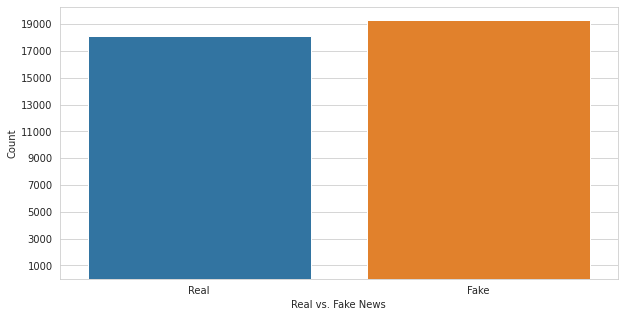

In [13]:
# Real and Fake News Count - Barplot
real_count = train_df3[train_df3.type == 'real'].shape[0]
fake_count = train_df3[train_df3.type == 'fake'].shape[0]
print("Real News Count: ", real_count)
print("Fake News Count: ", fake_count)

real_vs_fake_type = ['Real', 'Fake']
real_vs_fake_count = [real_count, fake_count]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(1000,20000,2000))
plt.ylabel("Count")
plt.xlabel("Real vs. Fake News")
sns.barplot(x=real_vs_fake_type, y=real_vs_fake_count)
plt.show()


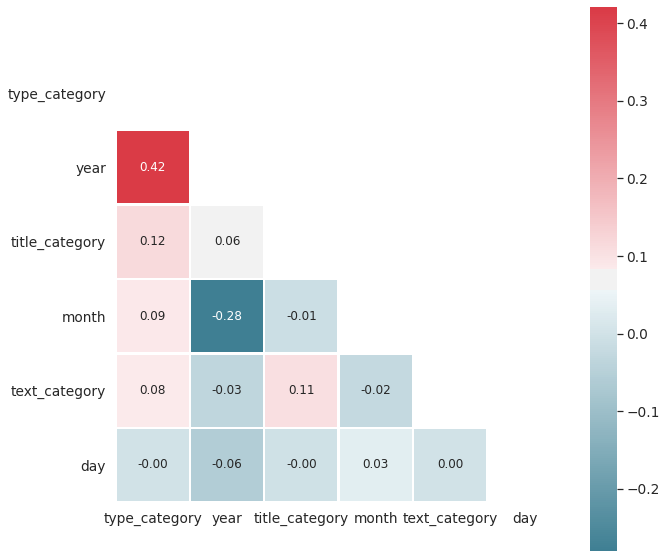

In [14]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(10,10)})

def plot_corr_matrix(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    mask = np.zeros_like(corr_abs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c, nr_c))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.set(font_scale=1.25)
    with sns.axes_style("white"):
        sns.heatmap(cm, linewidths=1.5, annot=True, square=True, cmap=cmap,
                    fmt='.2f', annot_kws={'size': 12}, mask=mask,
                    yticklabels=cols.values, xticklabels=cols.values
                   )
    plt.show()
    
plot_corr_matrix(train_df3, len(train_df3.columns), 'type_category')

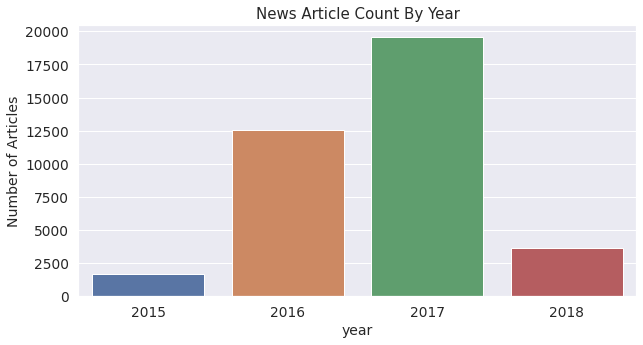

In [15]:
year_count  = train_df3['year'].value_counts()
year_count = year_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(year_count.index, year_count.values)
plt.title('News Article Count By Year')
plt.ylabel('Number of Articles', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.show()

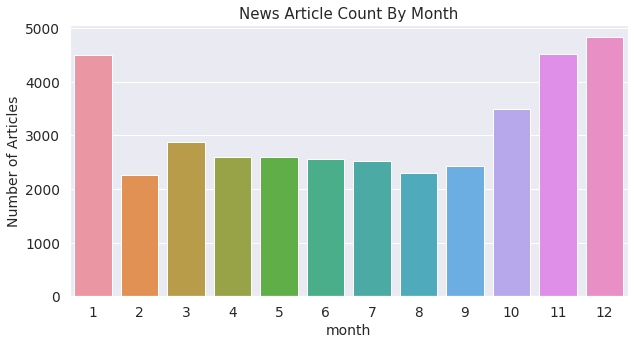

In [16]:
month_count  = train_df3['month'].value_counts()
month_count = month_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(month_count.index, month_count.values)
plt.title('News Article Count By Month')
plt.ylabel('Number of Articles', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.show()

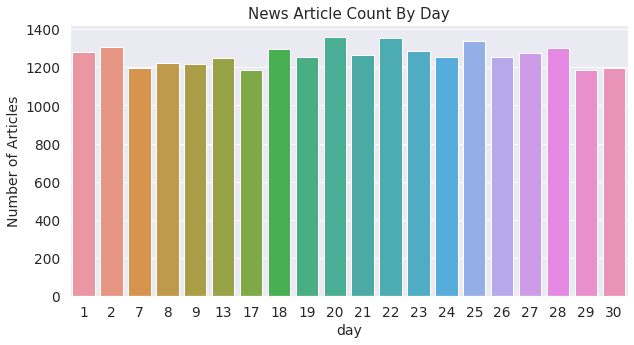

In [17]:
day_count  = train_df3['day'].value_counts()
day_count = day_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(day_count.index, day_count.values)
plt.title('News Article Count By Day')
plt.ylabel('Number of Articles', fontsize=14)
plt.xlabel('day', fontsize=14)
plt.show()

# **Feature Selection Methods**
* Univariate Selection using SelectKBest class
* Feature Importance using Random Forest and Extra Trees class
* Principal Component Analysis (PCA)

In [18]:
# Feature Selection
y_train_fSelect = train_df3.type_category

feature_select_df = train_df3[['month', 'day', 'year', 'title_category', 'text_category']]
feature_select_df

,month,day,year,title_category,text_category
0,3,11,2016,10918,27188
1,10,9,2017,7095,8445
2,2,1,2018,15950,16017
3,11,20,2016,3425,18280
4,7,6,2017,18669,28255
...,...,...,...,...,...
38011,6,10,2017,11147,10576
38012,8,18,2016,8945,1026
38013,11,15,2017,10947,3406
38014,11,28,2017,6145,4985


In [19]:
# Feature Selection Method - SelectKBest. K = # of features for selection
kbest_feature_select = SelectKBest(score_func=chi2, k=2).fit_transform(feature_select_df, y_train_fSelect)
print("Feature Predicted Best Values: ")
print(kbest_feature_select)
print("")
# Feature Selection - Compare new values with feature set values
print ("Feature Set Values: ")
feature_select_df.head()

Feature Predicted Best Values: 
[[10918 27188]
 [ 7095  8445]
 [15950 16017]
 ...
 [10947  3406]
 [ 6145  4985]
 [32119 31334]]

Feature Set Values: 


,month,day,year,title_category,text_category
0,3,11,2016,10918,27188
1,10,9,2017,7095,8445
2,2,1,2018,15950,16017
3,11,20,2016,3425,18280
4,7,6,2017,18669,28255


In [20]:
# Feature Selection Method - Feature Importance using Bagged decision trees like Random Forest and Extra Trees
fSelect_model = ExtraTreesClassifier(n_estimators=5)
fSelect_model.fit(feature_select_df, y_train_fSelect)
print("Feature Importance Score: %s" % fSelect_model.feature_importances_)
print("")
# Feature Selection - Compare new values with feature values
print ("Feature Values: ")
feature_select_df.head()

Feature Importance Score: [0.11973198 0.0805456  0.18511498 0.21164385 0.4029636 ]

Feature Values: 


,month,day,year,title_category,text_category
0,3,11,2016,10918,27188
1,10,9,2017,7095,8445
2,2,1,2018,15950,16017
3,11,20,2016,3425,18280
4,7,6,2017,18669,28255


In [21]:
# Feature Selection Method - Principal Component Analysis (PCA)
pca_fSelect_model = PCA(n_components=1)
pca_fSelect_model_fit = pca_fSelect_model.fit(feature_select_df)
print("Explained Variance with 1 Components: %s" % pca_fSelect_model_fit.explained_variance_ratio_)
print(pca_fSelect_model_fit.components_)
print("")

pca_fSelect_model = PCA(n_components=2)
pca_fSelect_model_fit = pca_fSelect_model.fit(feature_select_df)
print("Explained Variance with 2 Components: %s" % pca_fSelect_model_fit.explained_variance_ratio_)
print(pca_fSelect_model_fit.components_)
print("")

pca_fSelect_model = PCA(n_components=3)
pca_fSelect_model_fit = pca_fSelect_model.fit(feature_select_df)
print("Explained Variance with 3 Components: %s" % pca_fSelect_model_fit.explained_variance_ratio_)
print(pca_fSelect_model_fit.components_)
print("")

pca_fSelect_model = PCA(n_components=4)
pca_fSelect_model_fit = pca_fSelect_model.fit(feature_select_df)
print("Explained Variance with 4 Components: %s" % pca_fSelect_model_fit.explained_variance_ratio_)
print(pca_fSelect_model_fit.components_)
print("")

pca_fSelect_model = PCA(n_components=5)
pca_fSelect_model_fit = pca_fSelect_model.fit(feature_select_df)
print("Explained Variance with 5 Components: %s" % pca_fSelect_model_fit.explained_variance_ratio_)
print(pca_fSelect_model_fit.components_)
print("")

# Feature Selection - Compare new values with feature values
print ("Feature Values: ")
feature_select_df.head()

Explained Variance with 1 Components: [0.55316401]
[[-8.22509613e-06 -2.69788566e-07  1.05819246e-06  6.82634780e-01
   7.30759712e-01]]

Explained Variance with 2 Components: [0.55316401 0.44683549]
[[-8.22509613e-06 -2.69788566e-07  1.05819246e-06  6.82634780e-01
   7.30759712e-01]
 [-3.94406958e-06  9.74328860e-07 -5.20944712e-06 -7.30759712e-01
   6.82634780e-01]]

Explained Variance with 3 Components: [5.53164010e-01 4.46835486e-01 4.24467578e-07]
[[-8.22509613e-06 -2.69788567e-07  1.05819246e-06  6.82634780e-01
   7.30759712e-01]
 [-3.94406958e-06  9.74328860e-07 -5.20944712e-06 -7.30759712e-01
   6.82634780e-01]
 [ 1.69364933e-02  9.99845565e-01 -4.69064587e-03  9.63554016e-07
  -3.33544237e-07]]

Explained Variance with 4 Components: [5.53164010e-01 4.46835486e-01 4.24467578e-07 7.75748909e-08]
[[-8.22509613e-06 -2.69788566e-07  1.05819246e-06  6.82634780e-01
   7.30759712e-01]
 [-3.94406958e-06  9.74328860e-07 -5.20944712e-06 -7.30759712e-01
   6.82634780e-01]
 [ 1.69364933e-0

,month,day,year,title_category,text_category
0,3,11,2016,10918,27188
1,10,9,2017,7095,8445
2,2,1,2018,15950,16017
3,11,20,2016,3425,18280
4,7,6,2017,18669,28255


# **Data Preprocessing (After Feature Selection) - Part 2**
* Text Classification Cleaning Methods Used

In [0]:
# New Datasets after feature selection
new_features_df = train_df3[['title', 'text']]
new_target_df = train_df3[['type_category']]

In [0]:
# Features - Test Data
new_features_test = df_test[['title', 'text']]

In [24]:
print(len(new_features_test))
new_features_test.head()

3000


,title,text
0,Kremlin says Washington must prove hacking acc...,TOKYO (Reuters) - The Kremlin said on Friday t...
1,OBAMA KNEW DRONE KILLED U.S. HOSTAGE…Never Tol...,Why couldn t the parents be notified of his de...
2,Wife Of The Japanese PM Epically Trolled Trump...,Amateur president Donald Trump left his chair ...
3,FBI interviews Hillary Clinton in private serv...,NEW YORK (Reuters) - The Federal Bureau of Inv...
4,Factbox: Wall Street's take on possible impact...,(Reuters) - U.S. Democratic presidential candi...


In [25]:
# Make text lowercase
new_features_df.title = new_features_df.title.apply(lambda a: a.lower())
new_features_df.text = new_features_df.text.apply(lambda b: b.lower())

new_features_df.head()

,title,text
0,governor extends flint water emergency as stat...,washington (reuters) - michigan governor rick ...
1,"democrats conveniently forget 6,000 prisoners ...",democrats are calling for president trump s sc...
2,mexico recognizes honduran president as winner...,mexico city (reuters) - mexico recognized hond...
3,boom! wikileaks shows hillary speech to banker...,no wonder she didn t want anyone to see her sp...
4,paul ryan says confident tax reform will pass ...,washington (reuters) - republicans will be abl...


In [26]:
# Make text lowercase - Test Data
new_features_test.title = new_features_test.title.apply(lambda a: a.lower())
new_features_test.text = new_features_test.text.apply(lambda b: b.lower())

print(len(new_features_test))
new_features_test.head()

3000


,title,text
0,kremlin says washington must prove hacking acc...,tokyo (reuters) - the kremlin said on friday t...
1,obama knew drone killed u.s. hostage…never tol...,why couldn t the parents be notified of his de...
2,wife of the japanese pm epically trolled trump...,amateur president donald trump left his chair ...
3,fbi interviews hillary clinton in private serv...,new york (reuters) - the federal bureau of inv...
4,factbox: wall street's take on possible impact...,(reuters) - u.s. democratic presidential candi...


In [27]:
# Remove symbols commonly used for puncuation
translator = str.maketrans('', '', string.punctuation)
new_features_df.title = new_features_df.title.apply(lambda c: c.translate(translator))
new_features_df.text = new_features_df.text.apply(lambda d: d.translate(translator))

print(len(new_features_df))

37450


In [28]:
# Remove symbols commonly used for puncuation - Test Data
translator = str.maketrans('', '', string.punctuation)
new_features_test.title = new_features_test.title.apply(lambda c: c.translate(translator))
new_features_test.text = new_features_test.text.apply(lambda d: d.translate(translator))

print(len(new_features_test))

3000


In [29]:
# Remove Numbers
translator2 = str.maketrans('', '', string.digits)
new_features_df.title = new_features_df.title.apply(lambda e: e.translate(translator2))
new_features_df.text = new_features_df.text.apply(lambda f: f.translate(translator2))

print(len(new_features_df))
new_features_df.head()

37450


,title,text
0,governor extends flint water emergency as stat...,washington reuters michigan governor rick sny...
1,democrats conveniently forget prisoners obama...,democrats are calling for president trump s sc...
2,mexico recognizes honduran president as winner...,mexico city reuters mexico recognized hondura...
3,boom wikileaks shows hillary speech to bankers...,no wonder she didn t want anyone to see her sp...
4,paul ryan says confident tax reform will pass ...,washington reuters republicans will be able t...


In [30]:
# Remove Numbers - Test Data
translator2 = str.maketrans('', '', string.digits)
new_features_test.title = new_features_test.title.apply(lambda e: e.translate(translator2))
new_features_test.text = new_features_test.text.apply(lambda f: f.translate(translator2))

print(len(new_features_test))
new_features_test.head()

3000


,title,text
0,kremlin says washington must prove hacking acc...,tokyo reuters the kremlin said on friday that...
1,obama knew drone killed us hostage…never told ...,why couldn t the parents be notified of his de...
2,wife of the japanese pm epically trolled trump...,amateur president donald trump left his chair ...
3,fbi interviews hillary clinton in private serv...,new york reuters the federal bureau of invest...
4,factbox wall streets take on possible impact o...,reuters us democratic presidential candidate ...


In [31]:
# Combine Columns
new_features_df["combined_text"] = new_features_df["title"].astype(str) + ' ' + new_features_df["text"].astype(str)

print(len(new_features_df))
new_features_df.head()

37450


,title,text,combined_text
0,governor extends flint water emergency as stat...,washington reuters michigan governor rick sny...,governor extends flint water emergency as stat...
1,democrats conveniently forget prisoners obama...,democrats are calling for president trump s sc...,democrats conveniently forget prisoners obama...
2,mexico recognizes honduran president as winner...,mexico city reuters mexico recognized hondura...,mexico recognizes honduran president as winner...
3,boom wikileaks shows hillary speech to bankers...,no wonder she didn t want anyone to see her sp...,boom wikileaks shows hillary speech to bankers...
4,paul ryan says confident tax reform will pass ...,washington reuters republicans will be able t...,paul ryan says confident tax reform will pass ...


In [32]:
# Combine Columns - Test Data
new_features_test["combined_text"] = new_features_test["title"].astype(str) + ' ' + new_features_test["text"].astype(str)

print(len(new_features_test))
new_features_test.head()

3000


,title,text,combined_text
0,kremlin says washington must prove hacking acc...,tokyo reuters the kremlin said on friday that...,kremlin says washington must prove hacking acc...
1,obama knew drone killed us hostage…never told ...,why couldn t the parents be notified of his de...,obama knew drone killed us hostage…never told ...
2,wife of the japanese pm epically trolled trump...,amateur president donald trump left his chair ...,wife of the japanese pm epically trolled trump...
3,fbi interviews hillary clinton in private serv...,new york reuters the federal bureau of invest...,fbi interviews hillary clinton in private serv...
4,factbox wall streets take on possible impact o...,reuters us democratic presidential candidate ...,factbox wall streets take on possible impact o...


In [33]:
# Tokenize Words
tokenize_words = RegexpTokenizer(r'\w+')
new_features_df["combined_text"] = new_features_df["combined_text"].apply(lambda r: tokenize_words.tokenize(r))

print(len(new_features_df))
new_features_df.head()

37450


,title,text,combined_text
0,governor extends flint water emergency as stat...,washington reuters michigan governor rick sny...,"[governor, extends, flint, water, emergency, a..."
1,democrats conveniently forget prisoners obama...,democrats are calling for president trump s sc...,"[democrats, conveniently, forget, prisoners, o..."
2,mexico recognizes honduran president as winner...,mexico city reuters mexico recognized hondura...,"[mexico, recognizes, honduran, president, as, ..."
3,boom wikileaks shows hillary speech to bankers...,no wonder she didn t want anyone to see her sp...,"[boom, wikileaks, shows, hillary, speech, to, ..."
4,paul ryan says confident tax reform will pass ...,washington reuters republicans will be able t...,"[paul, ryan, says, confident, tax, reform, wil..."


In [34]:
# Tokenize Words - Test Data
tokenize_words = RegexpTokenizer(r'\w+')
new_features_test["combined_text"] = new_features_test["combined_text"].apply(lambda r: tokenize_words.tokenize(r))

print(len(new_features_test))
new_features_test.head()

3000


,title,text,combined_text
0,kremlin says washington must prove hacking acc...,tokyo reuters the kremlin said on friday that...,"[kremlin, says, washington, must, prove, hacki..."
1,obama knew drone killed us hostage…never told ...,why couldn t the parents be notified of his de...,"[obama, knew, drone, killed, us, hostage, neve..."
2,wife of the japanese pm epically trolled trump...,amateur president donald trump left his chair ...,"[wife, of, the, japanese, pm, epically, trolle..."
3,fbi interviews hillary clinton in private serv...,new york reuters the federal bureau of invest...,"[fbi, interviews, hillary, clinton, in, privat..."
4,factbox wall streets take on possible impact o...,reuters us democratic presidential candidate ...,"[factbox, wall, streets, take, on, possible, i..."


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# Remove Stopwords Function
def remove_stop_words(df):
    # Remove stopwords
    stop_words = stopwords.words('english')
    stop_word_filter = [text for text in df if text not in stop_words]

    return stop_word_filter

new_features_df["combined_text"] = new_features_df["combined_text"].apply(lambda s: remove_stop_words(s))   

In [37]:
# Remove Stopwords Function - Test Data
def remove_stop_words(df):
    # Remove stopwords
    stop_words = stopwords.words('english')
    stop_word_filter = [text for text in df if text not in stop_words]

    return stop_word_filter

new_features_test["combined_text"] = new_features_test["combined_text"].apply(lambda s: remove_stop_words(s))  
print(len(new_features_test))

3000


In [0]:
# Stem Words
def stem_words(df):
    stemW = PorterStemmer()
    stem_txt = " ".join([stemW.stem(b) for b in df])
    
    return stem_txt

new_features_df["combined_text"] = new_features_df["combined_text"].apply(lambda z: stem_words(z))

In [39]:
# Stem Words - Test Data
def stem_words(df):
    stemW = PorterStemmer()
    stem_txt = " ".join([stemW.stem(b) for b in df])
    
    return stem_txt

new_features_test["combined_text"] = new_features_test["combined_text"].apply(lambda z: stem_words(z))
print(len(new_features_test))

3000


# **Visualization of Word Frequency**
* Word Cloud
* Bar Graph

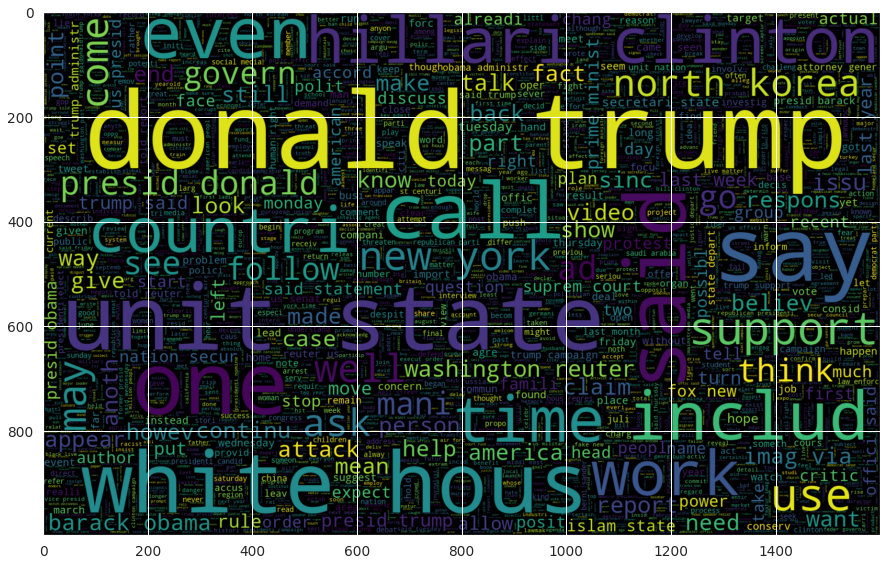

In [40]:
# Word Cloud
plt.figure(figsize = (15,15))
words_in_cloud_form = WordCloud(max_words = 5000 , width = 1600 , height = 1000 , stopwords = STOPWORDS).generate(
    " ".join(new_features_df.combined_text))
plt.imshow(words_in_cloud_form , interpolation = 'bilinear')

In [0]:
# Plot Function of most frequently used words
def initial_word_frequency_barplot(df, word):
    # Joining reviews for all rows together, then splitting on each word
    all_words_in_review = ' '.join([text for text in df])
    all_words_in_review = all_words_in_review.split()

    # Word Frequency Counter
    word_freq_counter = FreqDist(all_words_in_review)
    review_words_df = pd.DataFrame({'words': list(word_freq_counter.keys()), 'count': list(word_freq_counter.values())})

    # Selecting the top 30 most used words to plot
    col_select = review_words_df.nlargest(columns='count', n=word)
    plt.figure(figsize=(30, 5))
    ax = sns.barplot(data=col_select, x='words', y='count', palette='rocket')
    ax.set_ylabel(ylabel='Count', fontsize=20)
    ax.set_xlabel(xlabel='Word', fontsize=20)
    plt.xticks(rotation=45, ha="right", fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

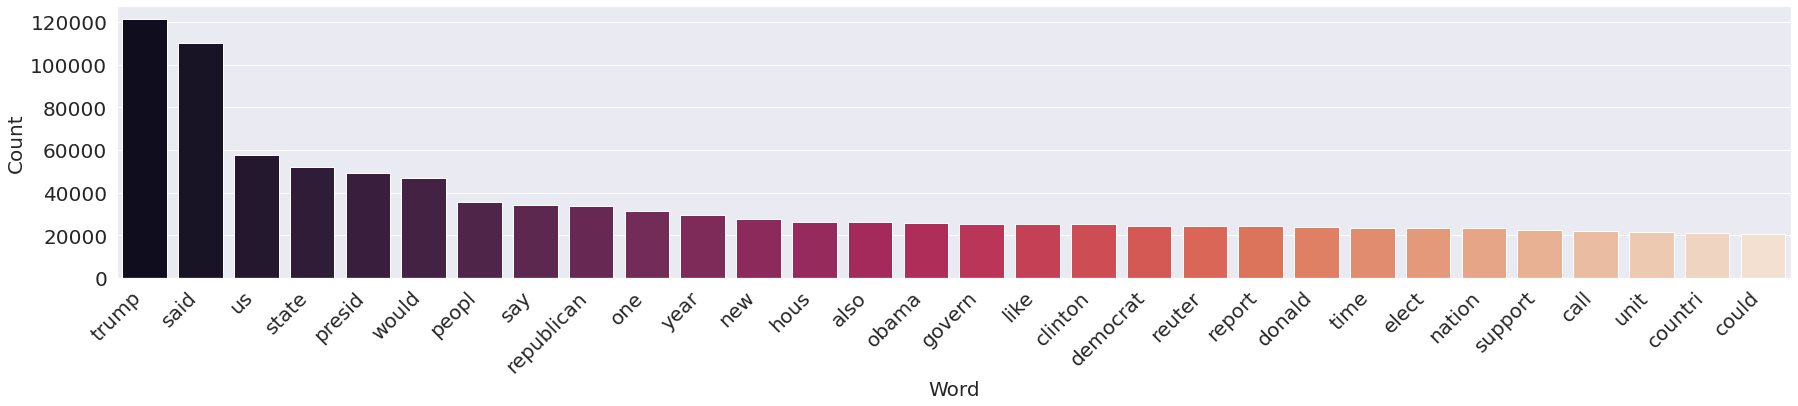

In [42]:
# Plot of most frequently used words (after data clean)
initial_word_frequency_barplot(new_features_df["combined_text"], 30)

# **Machine Learning - Classifier 1 CountVectorizer Method**
* Keras NN Model
* Multinomial Naive Bayes
* Random Forest
* SVM

In [0]:
# Train and test split
x_train,x_test,y_train,y_test = train_test_split(new_features_df.combined_text, new_target_df.type_category)

In [45]:
# Test File
x_train2 = new_features_df.combined_text
y_train2 = new_target_df.type_category
x_test2 = new_features_test.combined_text

print(len(new_features_test))

3000


In [46]:
# Building a Classifier #1 - CountVectorizer Method

cv_output = CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))

# Transform train dataset
cv_output_train = cv_output.fit_transform(x_train)

# Transform test dataset
cv_output_test = cv_output.transform(x_test)

print('Bag Of Words Count Vectorizer Train Dataset Output(Count and Shape of Dataset):', cv_output_train.shape)
print('Bag Of Words Count Vectorizer Test Dataset Output(Count and Shape of Dataset):', cv_output_test.shape)

Bag Of Words Count Vectorizer Train Dataset Output(Count and Shape of Dataset): (28087, 1639414)
Bag Of Words Count Vectorizer Test Dataset Output(Count and Shape of Dataset): (9363, 1639414)


In [47]:
# Run keras - Deep Learning - neural networks (recurrent) - 5 Epochs
deep_nn_model = Sequential()
deep_nn_model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_output_train.shape[1]))
deep_nn_model.add(Dense(units = 50 , activation = 'relu'))
deep_nn_model.add(Dense(units = 25 , activation = 'relu'))
deep_nn_model.add(Dense(units = 10 , activation = 'relu'))
deep_nn_model.add(Dense(units = 1 , activation = 'sigmoid'))

deep_nn_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# Fit Keras NN model with epochs = 5
deep_nn_model.fit(cv_output_train, y_train, epochs = 5)

Epoch 1/5
28087/28087 [==============================] - 289s 10ms/step - loss: 0.6928 - accuracy: 0.5126
Epoch 2/5
28087/28087 [==============================] - 279s 10ms/step - loss: 0.1045 - accuracy: 0.9693
Epoch 3/5
28087/28087 [==============================] - 273s 10ms/step - loss: 0.0569 - accuracy: 0.9830
Epoch 4/5
28087/28087 [==============================] - 271s 10ms/step - loss: 0.0557 - accuracy: 0.9832
Epoch 5/5
28087/28087 [==============================] - 270s 10ms/step - loss: 0.0557 - accuracy: 0.9832


In [0]:
# Prediction of RNN epochs = 5
deep_model_prediction = deep_nn_model.predict(cv_output_test)

# Change prediction of any values greater than 0.5 to 1 else 0
for p in range(len(deep_model_prediction)):
    if(deep_model_prediction[p] > 0.5):
        deep_model_prediction[p] = 1
    else:
        deep_model_prediction[p] = 0

([<matplotlib.axis.XTick at 0x7f124c3fd080>,
 <a list of 5 Text major ticklabel objects>)

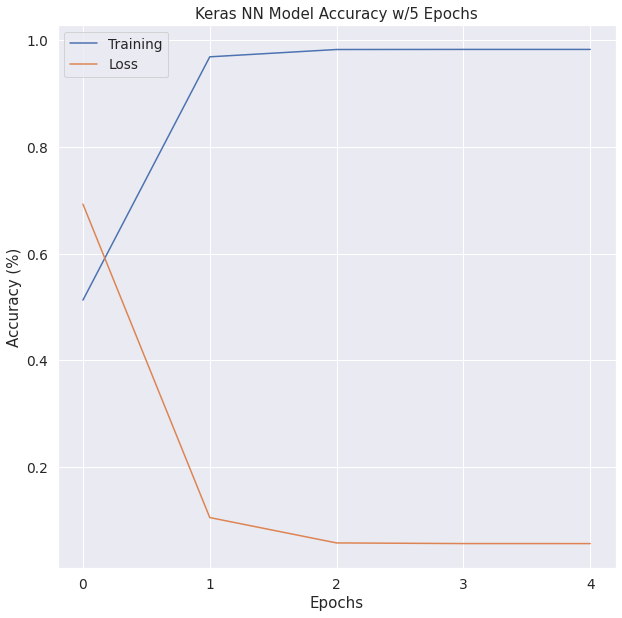

In [49]:
# Training Model Accuracy - Keras NN w/5 Epochs
plt.plot(deep_nn_model.history.history['accuracy'])
plt.plot(deep_nn_model.history.history['loss'])
plt.title('Keras NN Model Accuracy w/5 Epochs')
plt.legend(['Training', 'Loss'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

In [50]:
# Keras NN Model Accuracy w/5 Epochs
deep_model_accuracy = accuracy_score(deep_model_prediction, y_test)
print('Keras NN Model Accurary: ', deep_model_accuracy)

print("")

# Classification Report - Keras NN Model Accuracy w/5 Epochs
deep_class_report = classification_report(y_test, deep_model_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(deep_class_report)

Keras NN Model Accurary:  0.8782441525152195

              precision    recall  f1-score   support

    0 - fake     0.8559    0.9226    0.8880      4899
    1 - real     0.9072    0.8295    0.8666      4464

    accuracy                         0.8782      9363
   macro avg     0.8815    0.8761    0.8773      9363
weighted avg     0.8803    0.8782    0.8778      9363



In [0]:
# Prediction Stats
from sklearn import metrics

def prediction_stats(y_test, y_pred):
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2:", metrics.r2_score(y_test, y_pred))

In [52]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, deep_model_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.121755846
Mean Squared Error: 0.121755846
Root Mean Squared Error: 0.3489353
R2: 0.5119231047810944


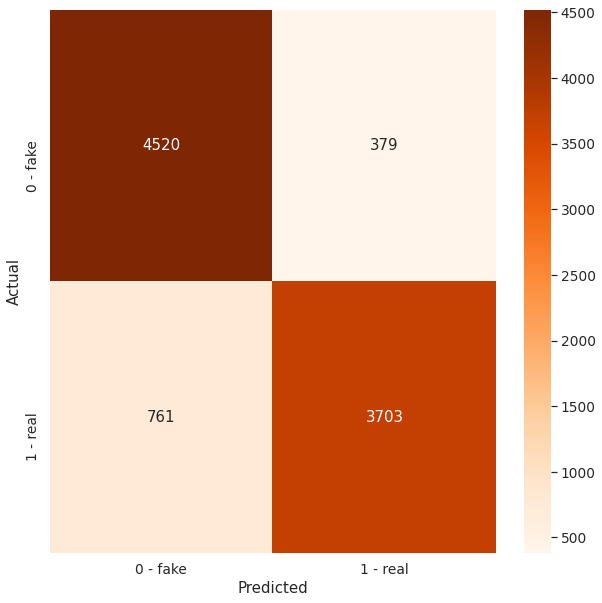

In [53]:
# Confusion Matrix - Keras NN Model Accuracy w/5 Epochs
conf_matrix = confusion_matrix(y_test, deep_model_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Oranges", annot = True, fmt='')

In [0]:
# Fit Multinomial Niave Bayes Model
mn_naive_bayes_model = MultinomialNB()
mn_naive_bayes_model.fit(cv_output_train, y_train)
mn_naive_bayes_prediction = mn_naive_bayes_model.predict(cv_output_test)

In [55]:
# Accuracy Score - Multinomial Niave Bayes Model
mn_naive_bayes_model_accuracy = accuracy_score(mn_naive_bayes_prediction, y_test)
print('Multinomial Niave Bayes Model Accurary: ', mn_naive_bayes_model_accuracy)

print("")

# Classification Report - Multinomial Niave Bayes Model
mn_naive_bayes_model_class_report = classification_report(y_test, mn_naive_bayes_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(mn_naive_bayes_model_class_report)

Multinomial Niave Bayes Model Accurary:  0.8986435971376695

              precision    recall  f1-score   support

    0 - fake     0.9348    0.8667    0.8995      4899
    1 - real     0.8646    0.9337    0.8978      4464

    accuracy                         0.8986      9363
   macro avg     0.8997    0.9002    0.8986      9363
weighted avg     0.9013    0.8986    0.8987      9363



In [56]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, mn_naive_bayes_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.10135640286233046
Mean Squared Error: 0.10135640286233046
Root Mean Squared Error: 0.31836520359852527
R2: 0.5936973916116304


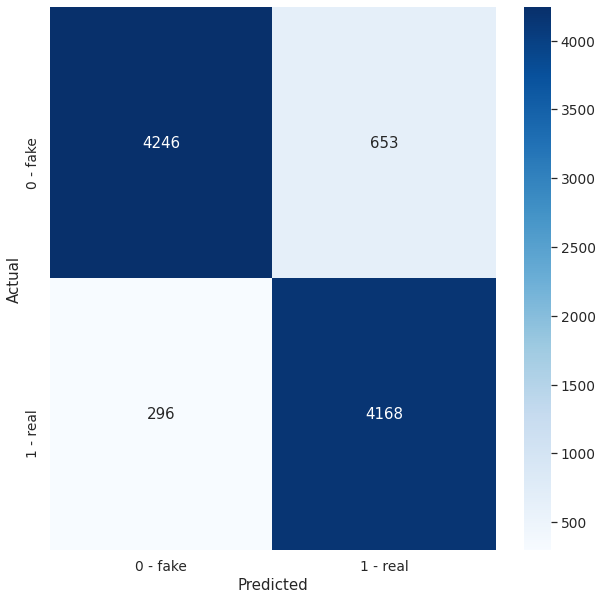

In [57]:
# Confusion Matrix - Multinomial Niave Bayes Model
conf_matrix = confusion_matrix(y_test, mn_naive_bayes_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", annot = True, fmt='')

In [0]:
# Fit Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(cv_output_train, y_train)
random_forest_prediction = random_forest_model.predict(cv_output_test)

In [59]:
# Accuracy Score - Random Forest Model
random_forest_model_accuracy1 = accuracy_score(random_forest_prediction, y_test)
print('Random Forest Model Accurary: ', random_forest_model_accuracy1)

print("")

# Classification Report - Random Forest Model
random_forest_model_class_report = classification_report(y_test, random_forest_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(random_forest_model_class_report)

Random Forest Model Accurary:  0.5592224714300972

              precision    recall  f1-score   support

    0 - fake     0.5430    0.9941    0.7024      4899
    1 - real     0.9266    0.0820    0.1506      4464

    accuracy                         0.5592      9363
   macro avg     0.7348    0.5380    0.4265      9363
weighted avg     0.7259    0.5592    0.4393      9363



In [60]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, random_forest_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.4407775285699028
Mean Squared Error: 0.4407775285699028
Root Mean Squared Error: 0.66391078359212
R2: -0.7669239882179153


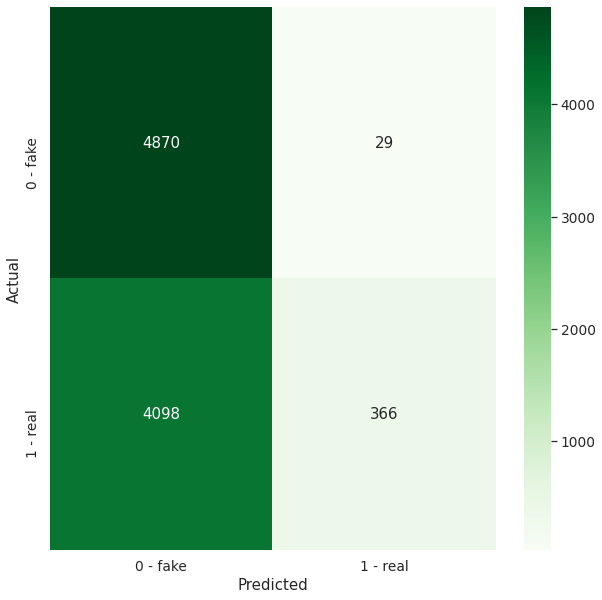

In [61]:
# Confusion Matrix - Random Forest Model
conf_matrix = confusion_matrix(y_test, random_forest_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Greens", annot = True, fmt='')

In [0]:
from sklearn import svm

# Create SVM Classifier
svm_class1 = svm.SVC(kernel='linear')

# Train Model
svm_class1.fit(cv_output_train, y_train)

# Prediction
svm_class1_prediction = svm_class1.predict(cv_output_test)

In [63]:
# Accuracy Score - SVM Model - Classifier 1
SVM_linear_model_accuracy2 = accuracy_score(svm_class1_prediction, y_test)
print('SVM Linear Model Accurary: ', SVM_linear_model_accuracy2)

print("")

# Classification Report - SVM Model - Classifier 2
SVM_linear_model_class_report2 = classification_report(y_test, svm_class1_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(SVM_linear_model_class_report2)

SVM Linear Model Accurary:  0.6341984406707252

              precision    recall  f1-score   support

    0 - fake     0.5910    0.9767    0.7364      4899
    1 - real     0.9100    0.2583    0.4024      4464

    accuracy                         0.6342      9363
   macro avg     0.7505    0.6175    0.5694      9363
weighted avg     0.7431    0.6342    0.5772      9363



In [64]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, svm_class1_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.36580155932927483
Mean Squared Error: 0.36580155932927483
Root Mean Squared Error: 0.6048153100982769
R2: -0.4663713737936419


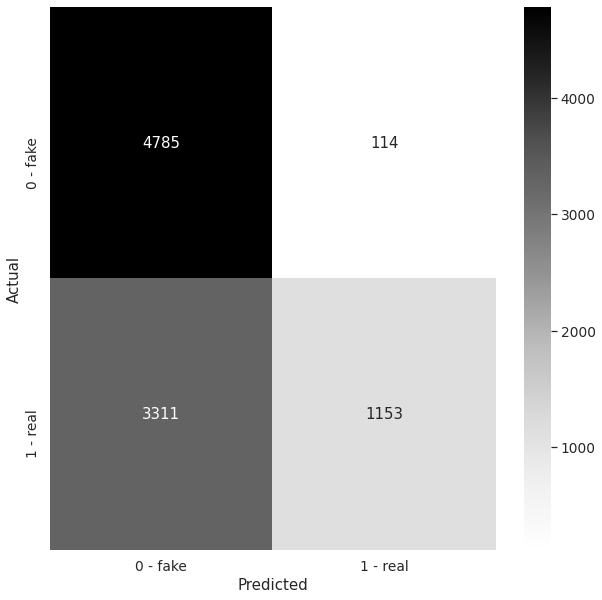

In [65]:
# Confusion Matrix - SVM Model - Classifier 1
conf_matrix = confusion_matrix(y_test, svm_class1_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Greys", annot = True, fmt='')

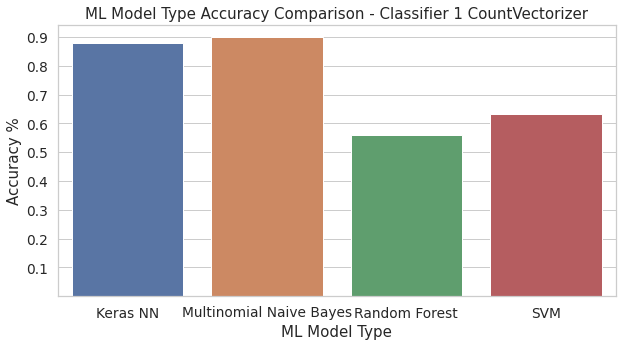

In [66]:
# Accuracy Comparison by Model - Classifier 1
model_type = ['Keras NN', 'Multinomial Naive Bayes', 'Random Forest', 'SVM']
model_acc = [deep_model_accuracy, mn_naive_bayes_model_accuracy, 
                      random_forest_model_accuracy1, SVM_linear_model_accuracy2]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0.10,1.00,0.10))
plt.ylabel("Accuracy %")
plt.xlabel("ML Model Type")
sns.barplot(x=model_type, y=model_acc).set_title("ML Model Type Accuracy Comparison - Classifier 1 CountVectorizer")
plt.show()

# **Machine Learning - Classifier 2 TfidfVectorizer Method**
* Keras NN Model
* Multinomial Naive Bayes
* Random Forest
* SVM

In [67]:
# Building a Classifier #2 - TfidTransformer Method from sklearn package
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vectorizer = TfidfVectorizer()

# Transform train dataset
tfid_vectorizer_train = tfid_vectorizer.fit_transform(x_train)

# Transform test dataset
tfid_vectorizer_test = tfid_vectorizer.transform(x_test)


print('Bag Of Words TfidTransformer Train Dataset Output(Count and Shape of Dataset):', tfid_vectorizer_train.shape)
print('Bag Of Words TfidTransformer Test Dataset Output(Count and Shape of Dataset):', tfid_vectorizer_test.shape)

Bag Of Words TfidTransformer Train Dataset Output(Count and Shape of Dataset): (28087, 142200)
Bag Of Words TfidTransformer Test Dataset Output(Count and Shape of Dataset): (9363, 142200)


In [68]:
# Building a Classifier #2 - TfidTransformer Method from sklearn package - Test Data
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vectorizer2 = TfidfVectorizer()

# Transform train dataset
tfid_vectorizer_train2 = tfid_vectorizer2.fit_transform(x_train2)

# Transform test dataset
tfid_vectorizer_test2 = tfid_vectorizer2.transform(x_test2)


print('Bag Of Words TfidTransformer Train Dataset Output(Count and Shape of Dataset):', tfid_vectorizer_train2.shape)
print('Bag Of Words TfidTransformer Test Dataset Output(Count and Shape of Dataset):', tfid_vectorizer_test2.shape)

Bag Of Words TfidTransformer Train Dataset Output(Count and Shape of Dataset): (37450, 167144)
Bag Of Words TfidTransformer Test Dataset Output(Count and Shape of Dataset): (3000, 167144)


In [69]:
# Run keras - Deep Learning - neural networks (recurrent) - 5 Epochs - Classifier 2
deep_nn_model = Sequential()
deep_nn_model.add(Dense(units = 100 , activation = 'relu' , input_dim = tfid_vectorizer_train.shape[1]))
deep_nn_model.add(Dense(units = 50 , activation = 'relu'))
deep_nn_model.add(Dense(units = 25 , activation = 'relu'))
deep_nn_model.add(Dense(units = 10 , activation = 'relu'))
deep_nn_model.add(Dense(units = 1 , activation = 'sigmoid'))

deep_nn_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

# Fit Keras NN model with epochs = 5 - Classifier 2
deep_nn_model.fit(tfid_vectorizer_train, y_train, epochs = 5)

Epoch 1/5
28087/28087 [==============================] - 32s 1ms/step - loss: 0.0958 - accuracy: 0.9668
Epoch 2/5
28087/28087 [==============================] - 32s 1ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 3/5
28087/28087 [==============================] - 31s 1ms/step - loss: 5.0340e-04 - accuracy: 0.9999
Epoch 4/5
28087/28087 [==============================] - 31s 1ms/step - loss: 1.6771e-04 - accuracy: 1.0000
Epoch 5/5
28087/28087 [==============================] - 29s 1ms/step - loss: 1.9780e-05 - accuracy: 1.0000


In [0]:
# Prediction of RNN epochs = 5
model_prediction = deep_nn_model.predict(tfid_vectorizer_test)

# Change prediction of any values greater than 0.5 to 1 else 0
for p in range(len(model_prediction)):
    if(model_prediction[p] > 0.5):
        model_prediction[p] = 1
    else:
        model_prediction[p] = 0

([<matplotlib.axis.XTick at 0x7f124c738b38>,
 <a list of 5 Text major ticklabel objects>)

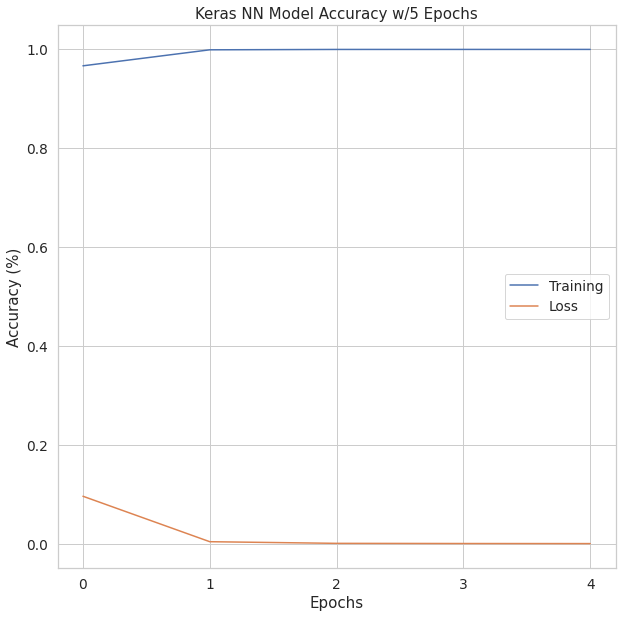

In [71]:
# Training Model Accuracy - Keras NN w/5 Epochs
plt.plot(deep_nn_model.history.history['accuracy'])
plt.plot(deep_nn_model.history.history['loss'])
plt.title('Keras NN Model Accuracy w/5 Epochs')
plt.legend(['Training', 'Loss'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

In [72]:
# Keras NN Model Accuracy w/5 Epochs
model_accuracy = accuracy_score(model_prediction, y_test)
print('Keras NN Model Accurary: ', model_accuracy)

print("")

# Classification Report - Keras NN Model Accuracy w/5 Epochs
class_report = classification_report(y_test, model_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(class_report)

Keras NN Model Accurary:  0.987824415251522

              precision    recall  f1-score   support

    0 - fake     0.9928    0.9839    0.9883      4899
    1 - real     0.9825    0.9922    0.9873      4464

    accuracy                         0.9878      9363
   macro avg     0.9876    0.9880    0.9878      9363
weighted avg     0.9879    0.9878    0.9878      9363



In [73]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, model_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.012175585
Mean Squared Error: 0.012175585
Root Mean Squared Error: 0.11034303
R2: 0.9511923104781095


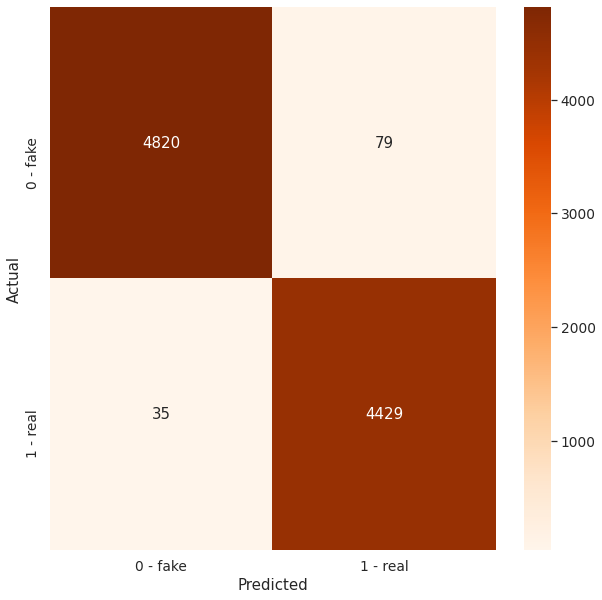

In [74]:
# Confusion Matrix - Keras NN Model Accuracy w/5 Epochs
conf_matrix = confusion_matrix(y_test, model_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Oranges", annot = True, fmt='')

In [0]:
# Fit Multinomial Niave Bayes Model
mn_naive_bayes_model = MultinomialNB()
mn_naive_bayes_model.fit(tfid_vectorizer_train, y_train)
mn_naive_bayes_prediction = mn_naive_bayes_model.predict(tfid_vectorizer_test)

In [76]:
# Accuracy Score - Multinomial Niave Bayes Model
mn_naive_bayes_model_accuracy2 = accuracy_score(mn_naive_bayes_prediction, y_test)
print('Multinomial Niave Bayes Model Accurary: ', mn_naive_bayes_model_accuracy2)

print("")

# Classification Report - Multinomial Niave Bayes Model
mn_naive_bayes_model_class_report = classification_report(y_test, mn_naive_bayes_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(mn_naive_bayes_model_class_report)

Multinomial Niave Bayes Model Accurary:  0.9333546940083307

              precision    recall  f1-score   support

    0 - fake     0.9390    0.9333    0.9361      4899
    1 - real     0.9272    0.9335    0.9303      4464

    accuracy                         0.9334      9363
   macro avg     0.9331    0.9334    0.9332      9363
weighted avg     0.9334    0.9334    0.9334      9363



In [77]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, mn_naive_bayes_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.06664530599166933
Mean Squared Error: 0.06664530599166933
Root Mean Squared Error: 0.25815752166394323
R2: 0.7328421205117569


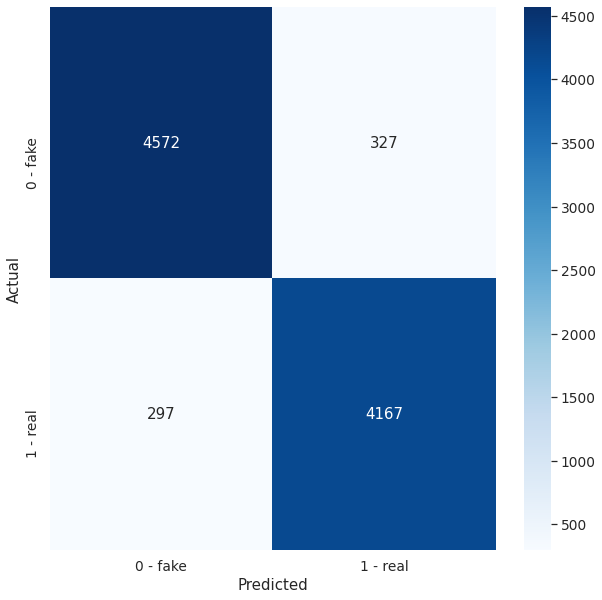

In [78]:
# Confusion Matrix - Multinomial Niave Bayes Model
conf_matrix = confusion_matrix(y_test, mn_naive_bayes_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", annot = True, fmt='')

In [0]:
# Fit Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(tfid_vectorizer_train, y_train)
random_forest_prediction = random_forest_model.predict(tfid_vectorizer_test)

In [80]:
# Accuracy Score - Random Forest Model
random_forest_model_accuracy = accuracy_score(random_forest_prediction, y_test)
print('Random Forest Model Accurary: ', random_forest_model_accuracy)

print("")

# Classification Report - Random Forest Model
random_forest_model_class_report = classification_report(y_test, random_forest_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(random_forest_model_class_report)

Random Forest Model Accurary:  0.9870767916266154

              precision    recall  f1-score   support

    0 - fake     0.9879    0.9873    0.9876      4899
    1 - real     0.9861    0.9868    0.9865      4464

    accuracy                         0.9871      9363
   macro avg     0.9870    0.9871    0.9870      9363
weighted avg     0.9871    0.9871    0.9871      9363



In [81]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, random_forest_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.0129232083733846
Mean Squared Error: 0.0129232083733846
Root Mean Squared Error: 0.11368029017109606
R2: 0.9481953470864144


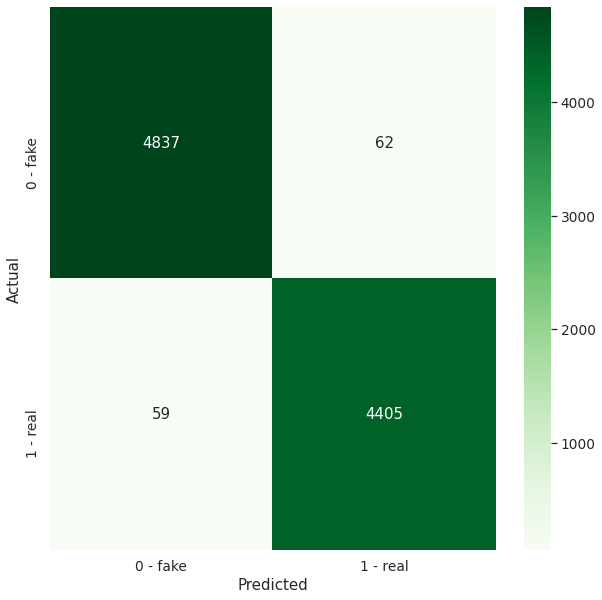

In [82]:
# Confusion Matrix - Random Forest Model
conf_matrix = confusion_matrix(y_test, random_forest_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Greens", annot = True, fmt='')

In [83]:
# Build SVM Model - Classifier 2
from sklearn.model_selection import cross_val_score
from sklearn import svm

# Create SVM Classifier
svm_class = svm.SVC(kernel='linear')

# Cross Validation
cross_score1 = cross_val_score(svm_class, tfid_vectorizer_train, y_train, cv=5, scoring='f1_macro')
print("F1 Macro Score: ", cross_score1)
print("")

F1 Macro Score:  [0.99340999 0.989135   0.99216263 0.9932298  0.99340888]



In [0]:
# Train Model
svm_class.fit(tfid_vectorizer_train, y_train)

# Prediction
svm_class_prediction = svm_class.predict(tfid_vectorizer_test)

In [0]:
# Test File Predicted Values
# Build SVM Model - Classifier 2
from sklearn import svm

# Create SVM Classifier
svm_class2 = svm.SVC(kernel='linear')

# Train Model
svm_class2.fit(tfid_vectorizer_train2, y_train2)

# Prediction
svm_class_prediction2 = svm_class2.predict(tfid_vectorizer_test2)

In [86]:
# Test Predictions into dataframe
final_sub = pd.DataFrame({'type': svm_class_prediction2})
y_test2 = final_sub['type']
map_type = {1:'real', 0:'fake'}
final_sub2 = final_sub.applymap(lambda n: map_type.get(n) if n in map_type else n)
final_sub

,type
0,1
1,0
2,0
3,1
4,1
...,...
2995,1
2996,1
2997,0
2998,0


In [87]:
# New Mapped Test Data Points
final_sub2

,type
0,real
1,fake
2,fake
3,real
4,real
...,...
2995,real
2996,real
2997,fake
2998,fake


In [0]:
# Output Test Predictions to csv
# final_sub2.to_csv('/content/drive/My Drive/Colab Notebooks/data/F3.csv', index=False)

In [89]:
y_test2

0       1
1       0
2       0
3       1
4       1
       ..
2995    1
2996    1
2997    0
2998    0
2999    1
Name: type, Length: 3000, dtype: int8

In [90]:
# Accuracy Score - SVM Model - Classifier 2 - Test Data
SVM_linear_model_accuracy2 = accuracy_score(svm_class_prediction2, y_test2)
print('SVM Linear Model Accurary: ', SVM_linear_model_accuracy2)

print("")

# Classification Report - SVM Model - Classifier 2
SVM_linear_model_class_report2 = classification_report(y_test2, svm_class_prediction2, target_names = ['0 - fake','1 - real'], digits=4)
print(SVM_linear_model_class_report2)

SVM Linear Model Accurary:  1.0

              precision    recall  f1-score   support

    0 - fake     1.0000    1.0000    1.0000      1533
    1 - real     1.0000    1.0000    1.0000      1467

    accuracy                         1.0000      3000
   macro avg     1.0000    1.0000    1.0000      3000
weighted avg     1.0000    1.0000    1.0000      3000



In [91]:
# Accuracy Score - SVM Model - Classifier 2
SVM_linear_model_accuracy = accuracy_score(svm_class_prediction, y_test)
print('SVM Linear Model Accurary: ', SVM_linear_model_accuracy)

print("")

# Classification Report - SVM Model - Classifier 2
SVM_linear_model_class_report = classification_report(y_test, svm_class_prediction, target_names = ['0 - fake','1 - real'], digits=4)
print(SVM_linear_model_class_report)

SVM Linear Model Accurary:  0.9918829435010146

              precision    recall  f1-score   support

    0 - fake     0.9943    0.9902    0.9922      4899
    1 - real     0.9893    0.9937    0.9915      4464

    accuracy                         0.9919      9363
   macro avg     0.9918    0.9920    0.9919      9363
weighted avg     0.9919    0.9919    0.9919      9363



In [92]:
print("Prediction Statistic Metrics:")
print("")
prediction_stats(y_test, svm_class_prediction)

Prediction Statistic Metrics:

Mean Absolute Error: 0.008117056498985368
Mean Squared Error: 0.008117056498985368
Root Mean Squared Error: 0.09009470849603415
R2: 0.9674615403187397


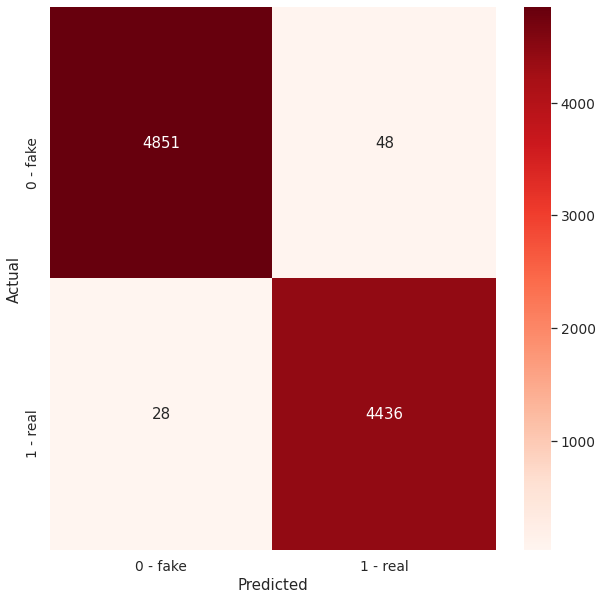

In [93]:
# Confusion Matrix - SVM Model - Classifier 2
conf_matrix = confusion_matrix(y_test, svm_class_prediction)
conf_matrix = pd.DataFrame(conf_matrix, index=['0 - fake', '1 - real'], columns=['0 - fake', '1 - real'])
conf_matrix.index.name = 'Actual'
conf_matrix.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Reds", annot = True, fmt='')

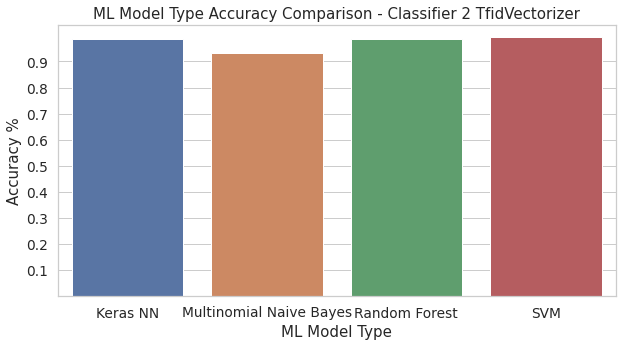

In [94]:
# Accuracy Comparison by Model - Classifier 2
model_type2 = ['Keras NN', 'Multinomial Naive Bayes', 'Random Forest', 'SVM']
model_acc2 = [model_accuracy, mn_naive_bayes_model_accuracy2, 
                      random_forest_model_accuracy, SVM_linear_model_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0.10,1.00,0.10))
plt.ylabel("Accuracy %")
plt.xlabel("ML Model Type")
sns.barplot(x=model_type2, y=model_acc2).set_title("ML Model Type Accuracy Comparison - Classifier 2 TfidVectorizer")
plt.show()